In [1]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,  MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.pipeline import Pipeline



import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("train.csv")
unseen = pd.read_csv("test.csv")

print(data.shape)
print(unseen.shape)

(29733, 61)
(9911, 60)


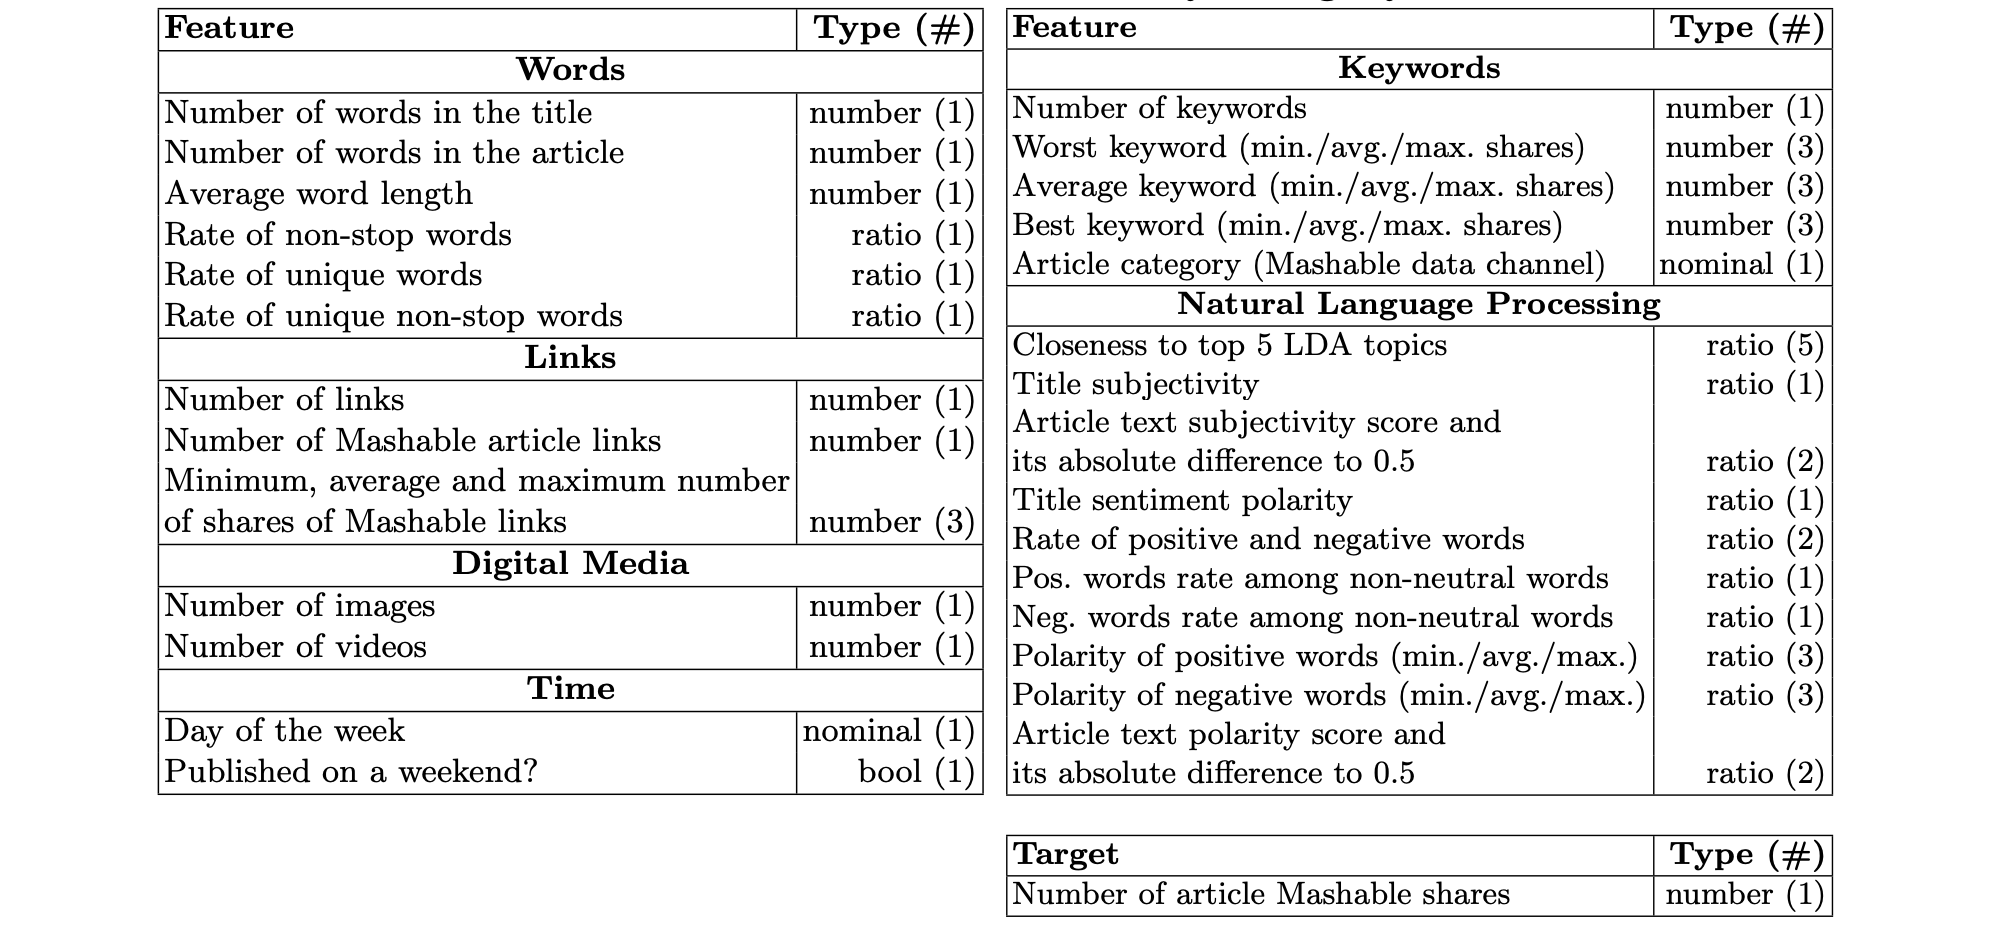

In [3]:
from IPython.display import Image
Image(filename="features.png")

In [4]:
word_features = ['n_tokens_title', 
                 'n_tokens_content', 
                 'n_unique_tokens', 
                 'n_non_stop_words', 
                 'n_non_stop_unique_tokens', 
                 'average_token_length']

media_features = ['num_imgs', 'num_videos']

temporal_features = ['weekday_is_monday', 
                     'weekday_is_tuesday', 
                     'weekday_is_wednesday',
                     'weekday_is_thursday',
                     'weekday_is_friday',
                     'weekday_is_saturday',
                     'weekday_is_sunday',
                     'is_weekend']

channel_features = ['data_channel_is_lifestyle', 'data_channel_is_entertainment', 
                    'data_channel_is_bus', 'data_channel_is_socmed', 
                    'data_channel_is_tech', 'data_channel_is_world']

keyword_features = ['kw_min_min', 'kw_max_min', 'kw_avg_min',
                    'kw_min_max', 'kw_max_max', 'kw_avg_max', 
                    'kw_min_avg', 'kw_max_avg', 'kw_avg_avg',
                    'num_keywords']


reference_features = ['num_hrefs',
                      'num_self_hrefs',
                      'self_reference_min_shares',
                      'self_reference_max_shares',
                      'self_reference_avg_sharess']

topic_features = ['LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04']

subjectivity_features = ['global_subjectivity', 'title_subjectivity', 'abs_title_subjectivity']

sentiment_features = ['global_sentiment_polarity', 'global_rate_positive_words',
                      'global_rate_negative_words', 'rate_positive_words',
                      'rate_negative_words', 'avg_positive_polarity',
                      'min_positive_polarity', 'max_positive_polarity',
                      'avg_negative_polarity', 'min_negative_polarity',
                      'max_negative_polarity', 'title_sentiment_polarity',
                      'abs_title_sentiment_polarity']

ids = ['id']

others = ['url']

target = ['shares']

In [5]:
features = [*ids, *word_features, *media_features, 
            *temporal_features, *channel_features, 
            *keyword_features, *reference_features, 
            *topic_features, *subjectivity_features, 
            *sentiment_features,*target]

len(features), len(data.columns)

(60, 61)

In [6]:
features2 = [*ids, *word_features, *media_features, 
            *temporal_features, *channel_features, 
            *keyword_features, *reference_features, 
            *topic_features, *subjectivity_features, 
            *sentiment_features]

In [7]:
data_1=data[features].set_index("id")

In [8]:
data_1.head()

n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
id                                                                        
0              8.0             211.0         0.629808               1.0   
1             12.0             416.0         0.603535               1.0   
2              7.0             229.0         0.638393               1.0   
3              9.0             473.0         0.542373               1.0   
4             13.0            1097.0         0.505213               1.0   

    n_non_stop_unique_tokens  average_token_length  num_imgs  num_videos  \
id                                                                         
0                   0.800000              4.606635       0.0         0.0   
1                   0.663580              5.004808       1.0        16.0   
2                   0.746479              4.829694       1.0         1.0   
3                   0.752809              4.634249       1.0         1.0   
4                   0.676343              4.678213      14.0         0.0   

    weekday_is_monday  weekday_is_tuesday  ...  rate_negative_words  \
id                                         ...                        
0                 0.0                 0.0  ...             0.125000   
1                 0.0                 0.0  ...             0.200000   
2                 0.0                 0.0  ...             0.384615   
3                 0.0                 0.0  ...             0.138889   
4                 0.0                 0.0  ...             0.196429   

    avg_positive_polarity  min_positive_polarity  max_positive_polarity  \
id                                                                        
0                0.413435               0.100000                    0.6   
1                0.324716               0.033333                    1.0   
2                0.354545               0.050000                    1.0   
3                0.356253               0.136364                    0.7   
4                0.366255               0.033333                    1.0   

    avg_negative_polarity  min_negative_polarity  max_negative_polarity  \
id                                                                        
0               -0.100000                    NaN              -0.100000   
1               -0.228621                -0.5000              -0.071429   
2               -0.260833                -0.5000              -0.166667   
3               -0.167500                -0.2500              -0.100000   
4               -0.193182                -0.3125              -0.100000   

    title_sentiment_polarity  abs_title_sentiment_polarity  shares  
id                                                                  
0                   0.600000                      0.600000   36700  
1                   0.000000                      0.000000   24200  
2                   0.000000                      0.000000     945  
3                   0.000000                      0.000000     844  
4                   0.166667                      0.166667     551  

[5 rows x 59 columns]

In [9]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29733 entries, 0 to 29732
Data columns (total 59 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   n_tokens_title                 29733 non-null  float64
 1   n_tokens_content               29733 non-null  float64
 2   n_unique_tokens                29733 non-null  float64
 3   n_non_stop_words               29733 non-null  float64
 4   n_non_stop_unique_tokens       29733 non-null  float64
 5   average_token_length           29733 non-null  float64
 6   num_imgs                       24326 non-null  float64
 7   num_videos                     29146 non-null  float64
 8   weekday_is_monday              28752 non-null  float64
 9   weekday_is_tuesday             28980 non-null  float64
 10  weekday_is_wednesday           28179 non-null  float64
 11  weekday_is_thursday            29434 non-null  float64
 12  weekday_is_friday              28867 non-null 

In [10]:
percent_missing = data_1.isnull().sum() * 100 / len(data_1)
missing_value_df = pd.DataFrame({'percent_missing': percent_missing})
missing_value_df

percent_missing
n_tokens_title                        0.000000
n_tokens_content                      0.000000
n_unique_tokens                       0.000000
n_non_stop_words                      0.000000
n_non_stop_unique_tokens              0.000000
average_token_length                  0.000000
num_imgs                             18.185181
num_videos                            1.974237
weekday_is_monday                     3.299364
weekday_is_tuesday                    2.532540
weekday_is_wednesday                  5.226516
weekday_is_thursday                   1.005617
weekday_is_friday                     2.912589
weekday_is_saturday                   0.306057
weekday_is_sunday                     5.031447
is_weekend                            7.291562
data_channel_is_lifestyle             0.000000
data_channel_is_entertainment         0.000000
data_channel_is_bus                   0.000000
data_channel_is_socmed                0.000000
data_channel_is_tech                  0.000000
data_channel_is_world                 0.000000
kw_min_min                            3.645781
kw_max_min                            1.533649
kw_avg_min                            0.282514
kw_min_max                            0.460767
kw_max_max                            5.095349
kw_avg_max                            0.393502
kw_min_avg                            1.025796
kw_max_avg                            2.290384
kw_avg_avg                            3.272458
num_keywords                          1.560556
num_hrefs                             2.730972
num_self_hrefs                       15.245687
self_reference_min_shares             0.955168
self_reference_max_shares             5.926075
self_reference_avg_sharess            1.089698
LDA_00                                0.000000
LDA_01                                0.000000
LDA_02                                0.000000
LDA_03                                0.000000
LDA_04                                0.000000
global_subjectivity                   7.553896
title_subjectivity                    0.430498
abs_title_subjectivity                2.687250
global_sentiment_polarity             1.180507
global_rate_positive_words            2.808327
global_rate_negative_words            2.986581
rate_positive_words                   1.974237
rate_negative_words                   1.994417
avg_positive_polarity                 4.163724
min_positive_polarity                 1.496654
max_positive_polarity                 0.501127
avg_negative_polarity                 0.628931
min_negative_polarity                 2.630074
max_negative_polarity                 2.394646
title_sentiment_polarity              0.897992
abs_title_sentiment_polarity          4.900279
shares                                0.000000

Detecting Outliers

In [11]:
data_1.describe()

n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
count    29733.000000      29733.000000     29733.000000      29733.000000   
mean        10.403861        545.376652         0.554071          1.004238   
std          2.122101        471.476136         4.064623          6.039790   
min          2.000000          0.000000         0.000000          0.000000   
25%          9.000000        245.000000         0.471376          1.000000   
50%         10.000000        407.000000         0.540000          1.000000   
75%         12.000000        714.000000         0.609053          1.000000   
max         23.000000       8474.000000       701.000000       1042.000000   

       n_non_stop_unique_tokens  average_token_length      num_imgs  \
count              29733.000000          29733.000000  24326.000000   
mean                   0.694586              4.542961      4.512785   
std                    3.768884              0.855936      8.335517   
min                    0.000000              0.000000      0.000000   
25%                    0.626598              4.477124      1.000000   
50%                    0.691275              4.663717      1.000000   
75%                    0.754545              4.854545      4.000000   
max                  650.000000              8.041534    128.000000   

         num_videos  weekday_is_monday  weekday_is_tuesday  ...  \
count  29146.000000       28752.000000        28980.000000  ...   
mean       1.263364           0.167884            0.186784  ...   
std        4.158469           0.373770            0.389745  ...   
min        0.000000           0.000000            0.000000  ...   
25%        0.000000           0.000000            0.000000  ...   
50%        0.000000           0.000000            0.000000  ...   
75%        1.000000           0.000000            0.000000  ...   
max       91.000000           1.000000            1.000000  ...   

       rate_negative_words  avg_positive_polarity  min_positive_polarity  \
count         29140.000000           28495.000000           29288.000000   
mean              0.287926               0.353170               0.095636   
std               0.156156               0.105223               0.071699   
min               0.000000               0.000000               0.000000   
25%               0.185714               0.305029               0.050000   
50%               0.280000               0.358636               0.100000   
75%               0.384615               0.411381               0.100000   
max               1.000000               1.000000               1.000000   

       max_positive_polarity  avg_negative_polarity  min_negative_polarity  \
count           29584.000000           29546.000000           28951.000000   
mean                0.755106              -0.259057              -0.521207   
std                 0.248494               0.128085               0.291191   
min                 0.000000              -1.000000              -1.000000   
25%                 0.600000              -0.327972              -0.700000   
50%                 0.800000              -0.253332              -0.500000   
75%                 1.000000              -0.186038              -0.300000   
max                 1.000000               0.000000               0.000000   

       max_negative_polarity  title_sentiment_polarity  \
count           29021.000000              29466.000000   
mean               -0.106996                  0.071137   
std                 0.095238                  0.265052   
min                -1.000000                 -1.000000   
25%                -0.125000                  0.000000   
50%                -0.100000                  0.000000   
75%                -0.050000                  0.148182   
max                 0.000000                  1.000000   

       abs_title_sentiment_polarity         shares  
count                  28276.000000   29733.000000  
mean                       0.155628    3439

Outliers can easily be detected through boxplot

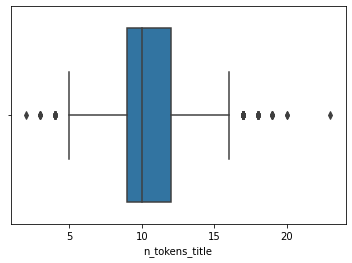

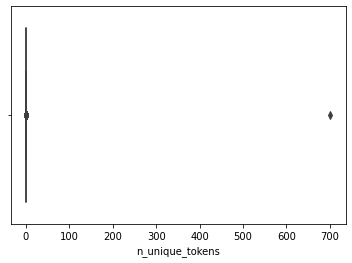

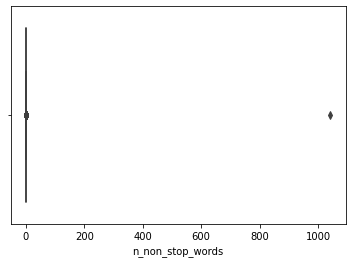

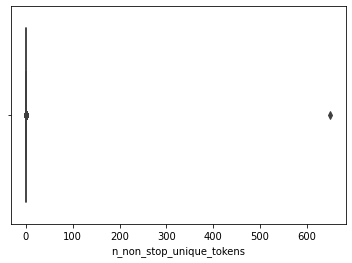

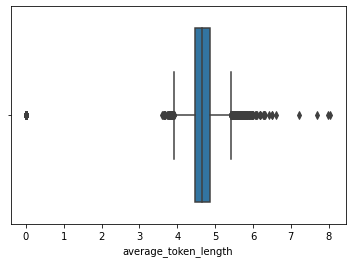

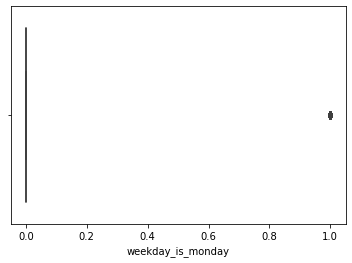

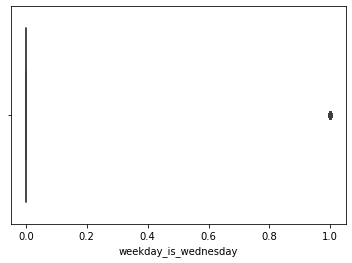

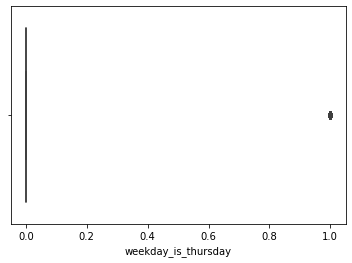

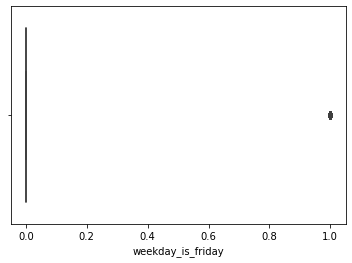

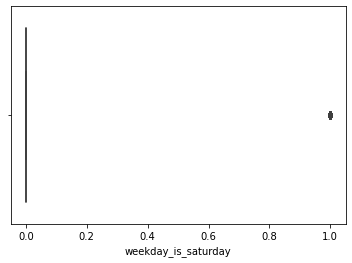

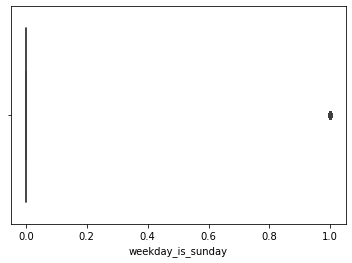

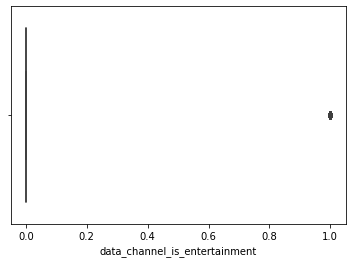

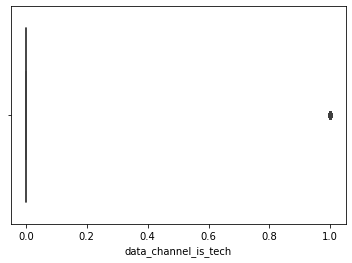

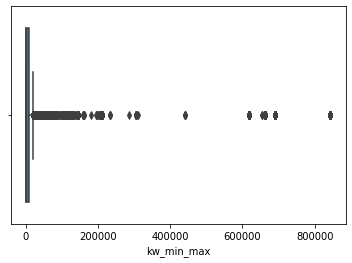

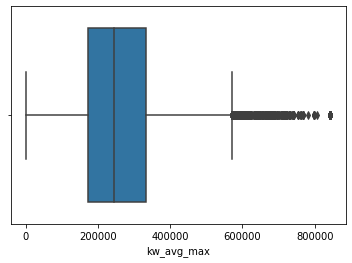

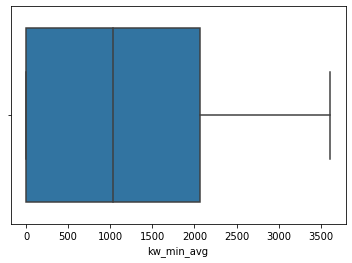

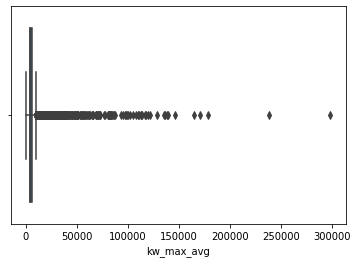

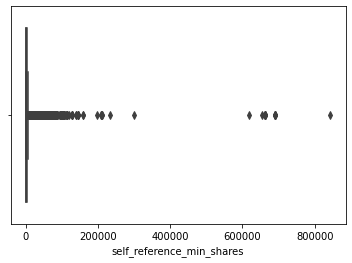

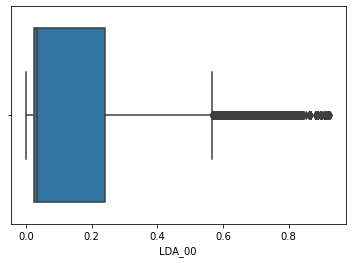

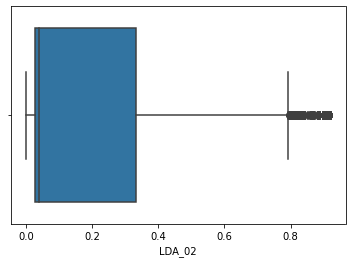

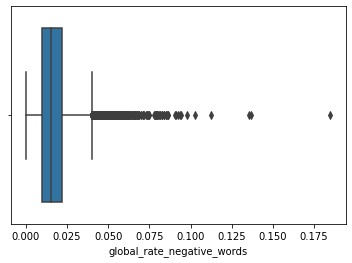

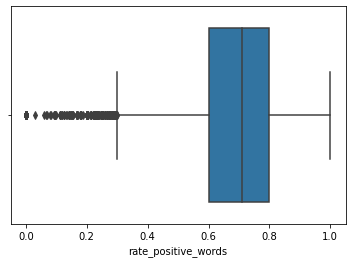

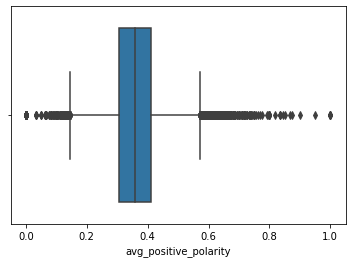

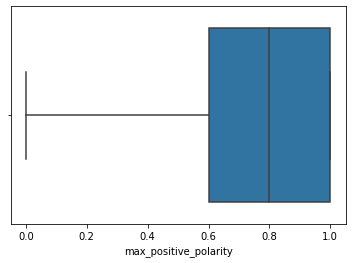

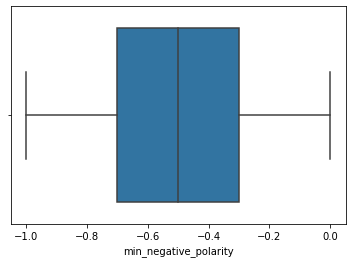

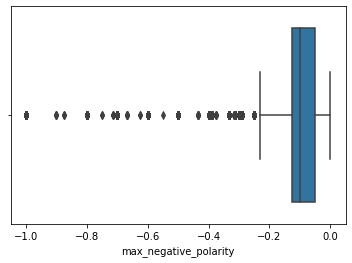

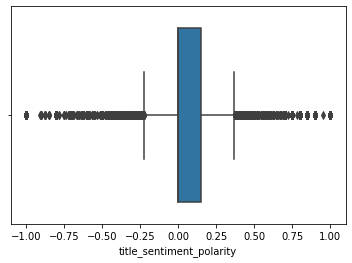

In [12]:
for i in data_1.columns:
    sns.boxplot(data_1[i])
    plt.show()

Removing Outliers

In [13]:
def cap_outliers(array, k=3):
    upper_limit = array.mean() + k*array.std()
    lower_limit = array.mean() - k*array.std()
    array[array<lower_limit] = lower_limit
    array[array>upper_limit] = upper_limit
    return array

In [14]:
data_1=data_1.apply(cap_outliers, axis=0)
data_2=data_1.copy()

In [15]:
imputer = SimpleImputer(missing_values = np.nan,
                        strategy ='mean')
imputer = imputer.fit_transform(data_1)

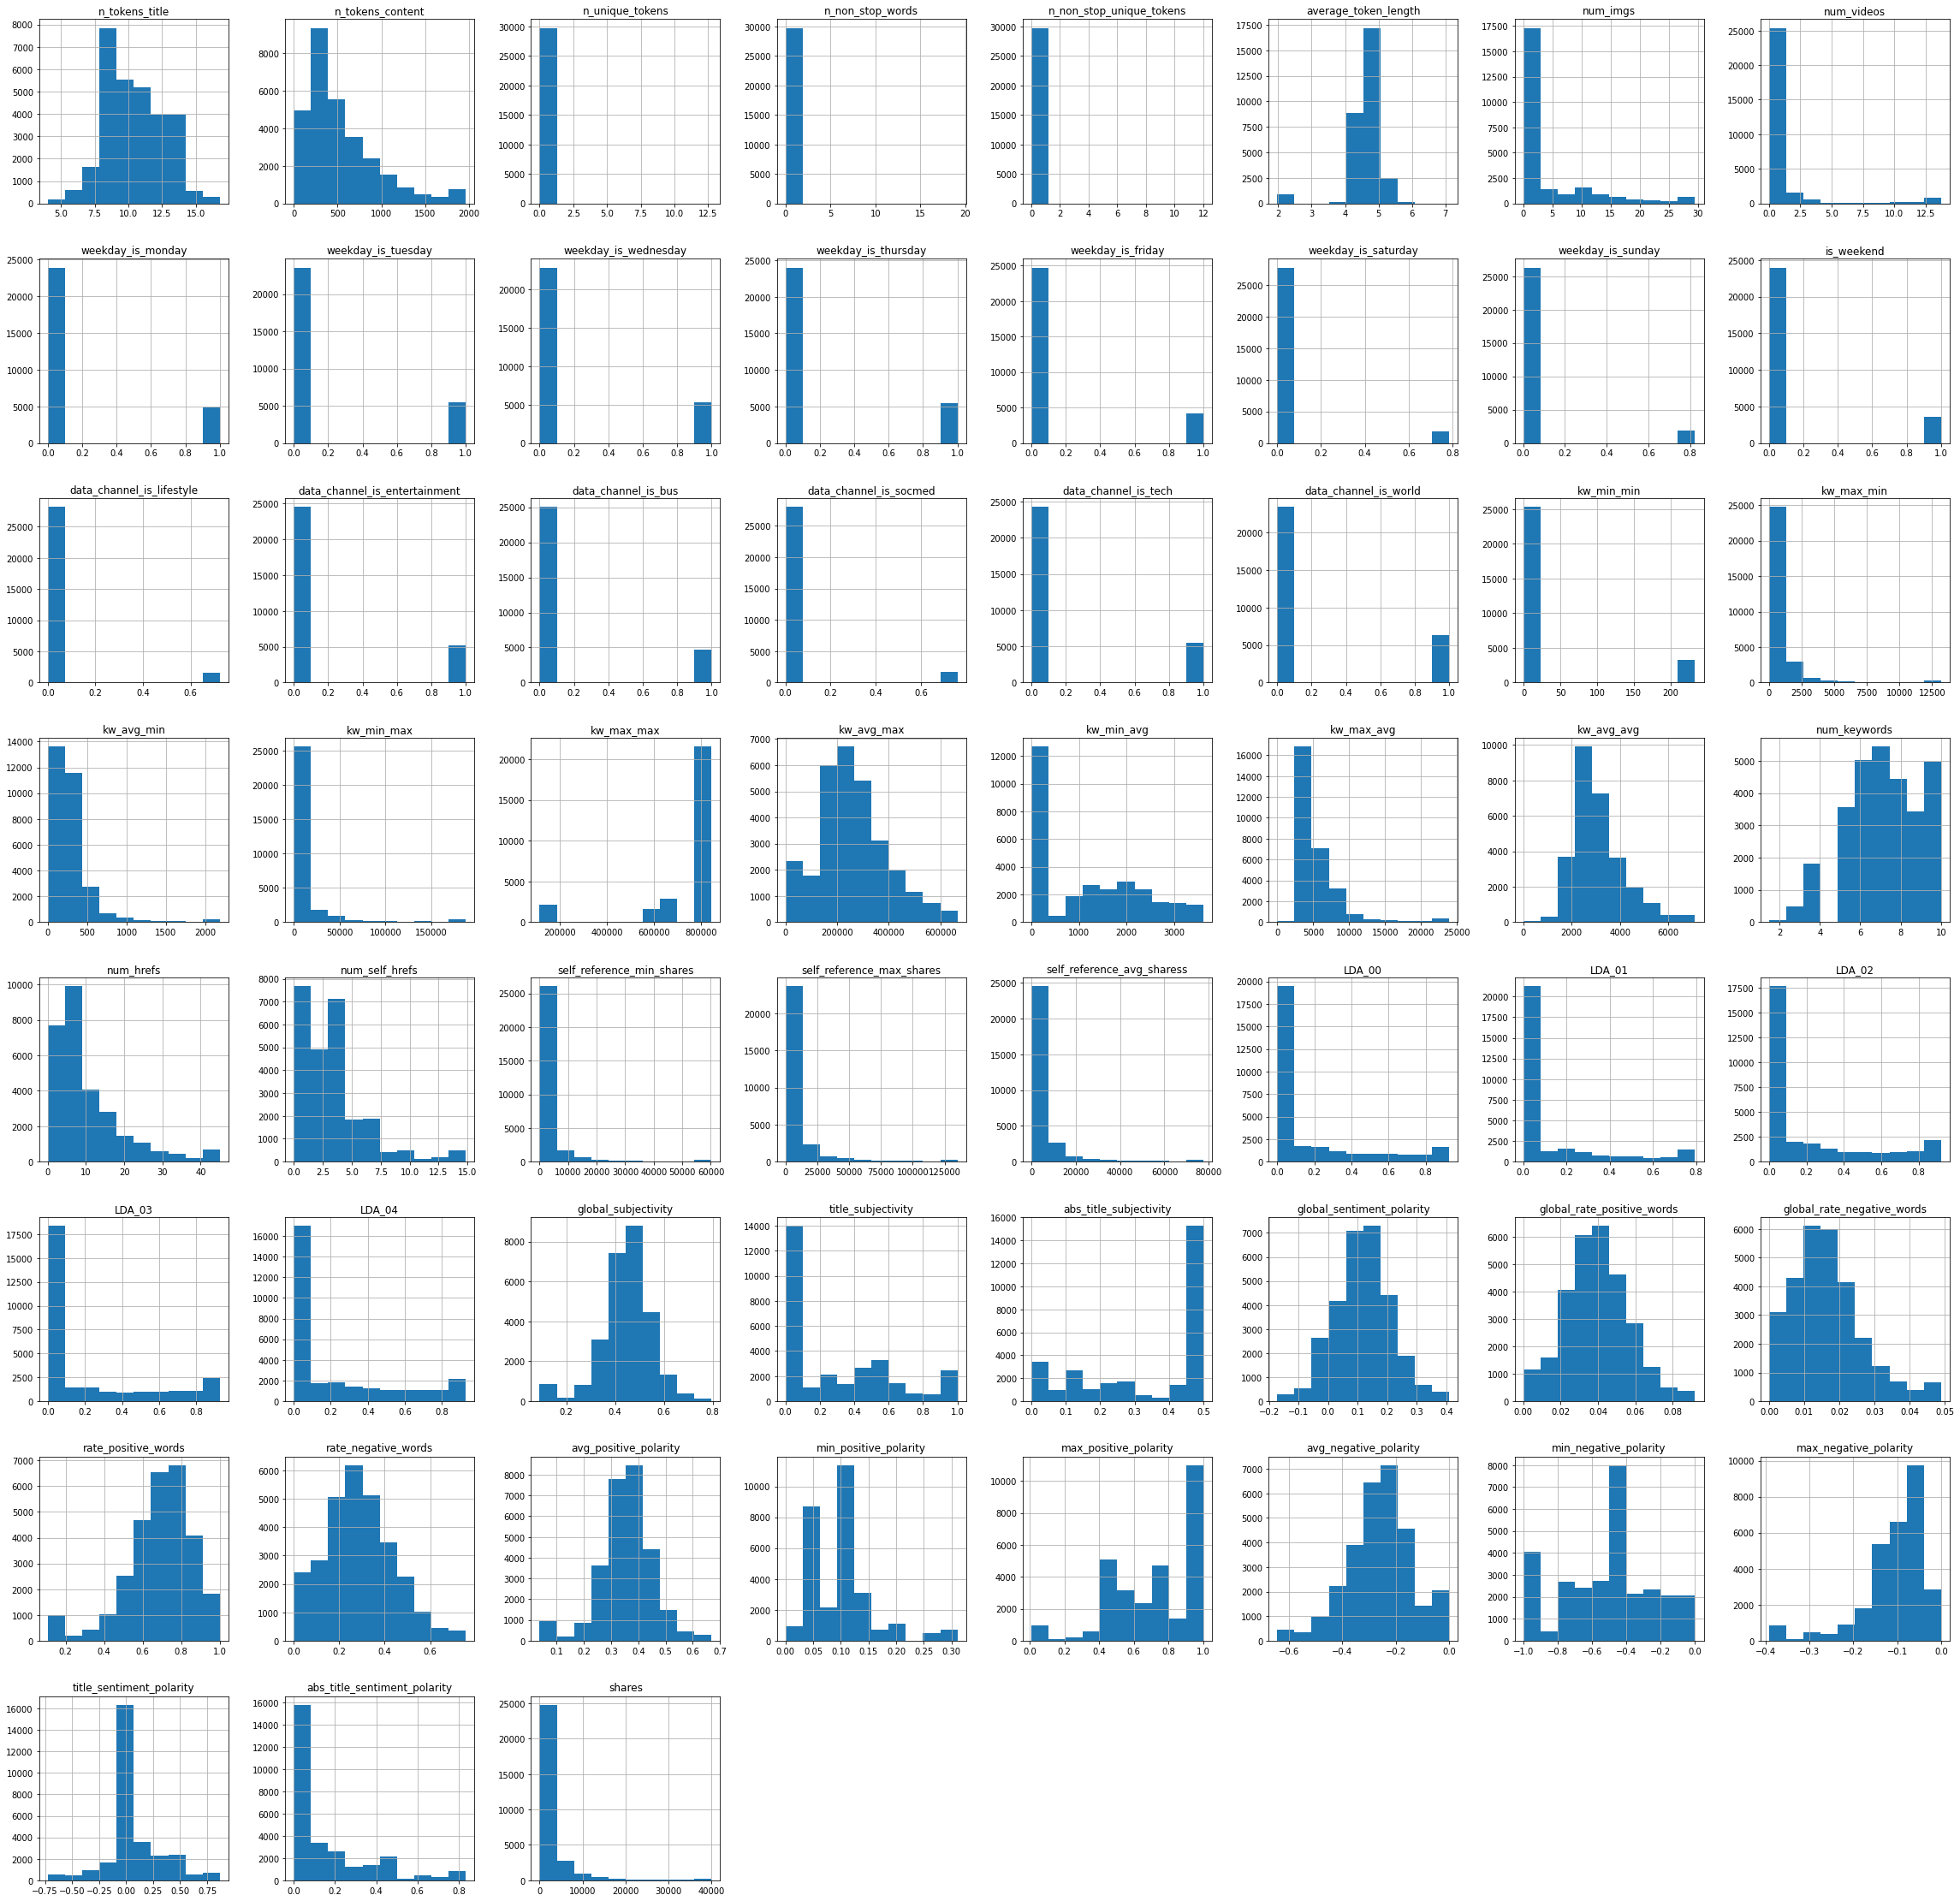

In [16]:
data_1.hist(figsize=(40,40))
plt.show()

In [17]:
#Helping Index for referrings
for i in range(len(data_1.columns)):
    print(f'{i} -> {data_1.columns[i]}')

0 -> n_tokens_title
1 -> n_tokens_content
2 -> n_unique_tokens
3 -> n_non_stop_words
4 -> n_non_stop_unique_tokens
5 -> average_token_length
6 -> num_imgs
7 -> num_videos
8 -> weekday_is_monday
9 -> weekday_is_tuesday
10 -> weekday_is_wednesday
11 -> weekday_is_thursday
12 -> weekday_is_friday
13 -> weekday_is_saturday
14 -> weekday_is_sunday
15 -> is_weekend
16 -> data_channel_is_lifestyle
17 -> data_channel_is_entertainment
18 -> data_channel_is_bus
19 -> data_channel_is_socmed
20 -> data_channel_is_tech
21 -> data_channel_is_world
22 -> kw_min_min
23 -> kw_max_min
24 -> kw_avg_min
25 -> kw_min_max
26 -> kw_max_max
27 -> kw_avg_max
28 -> kw_min_avg
29 -> kw_max_avg
30 -> kw_avg_avg
31 -> num_keywords
32 -> num_hrefs
33 -> num_self_hrefs
34 -> self_reference_min_shares
35 -> self_reference_max_shares
36 -> self_reference_avg_sharess
37 -> LDA_00
38 -> LDA_01
39 -> LDA_02
40 -> LDA_03
41 -> LDA_04
42 -> global_subjectivity
43 -> title_subjectivity
44 -> abs_title_subjectivity
45 -> glo

# Exploratory Data Analysis

In [18]:
a,b = data_1['shares'].mean(),data_1['shares'].median()

In [19]:
print(f'Mean article shares = {a}')
print(f'Median article share = {b}')

Mean article shares = 3057.236567399379
Median article share = 1400.0


In [20]:
Wd = data_1.columns.values[30:37]
Wd

array(['kw_avg_avg', 'num_keywords', 'num_hrefs', 'num_self_hrefs',
       'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess'], dtype=object)

In [21]:
Unpop=data_1[data_1['shares']<a]
Pop=data_1[data_1['shares']>=a]
Unpop_day = Unpop[Wd].sum().values
Pop_day = Pop[Wd].sum().values

fig = plt.figure(figsize = (13,10))
plt.title("Count of popular/unpopular news over different day of week (Mean)", fontsize = 16)
plt.bar(np.arange(len(Wd)), Pop_day, width = 0.3, align="center", color = 'r', \
          label = "popular")
plt.bar(np.arange(len(Wd)) - 0.3, Unpop_day, width = 0.3, align = "center", color = 'b', \
          label = "unpopular")
plt.xticks(np.arange(len(Wd)), Wd, rotation=90)
plt.ylabel("Count", fontsize = 12)
plt.xlabel("Days of week", fontsize = 12)
    
plt.legend(loc = 'upper right')
plt.tight_layout()
plt.show()

In [22]:
Unpop2=data_1[data_1['shares']<b]
Pop2=data_1[data_1['shares']>=b]
Unpop_day2 = Unpop2[Wd].sum().values
Pop_day2 = Pop2[Wd].sum().values
fig = plt.figure(figsize = (15,10))
plt.title("Count of popular/unpopular news over different day of week (Median)", fontsize = 16)
plt.bar(np.arange(len(Wd)), Pop_day2, width = 0.3, align="center", color = 'r', \
          label = "popular")
plt.bar(np.arange(len(Wd)) - 0.3, Unpop_day2, width = 0.3, align = "center", color = 'b', \
          label = "unpopular")
plt.xticks(np.arange(len(Wd)), Wd, rotation=90)
plt.ylabel("Count", fontsize = 12)
plt.xlabel("Days of week", fontsize = 12)
    
plt.legend(loc = 'upper right')
plt.tight_layout()
plt.show()

In [23]:
Dc = data_1.columns.values[12:18]

In [24]:
Unpop3=data_1[data_1['shares']<a]
Pop3=data_1[data_1['shares']>=a]
Unpop_day3 = Unpop3[Dc].sum().values
Pop_day3 = Pop3[Dc].sum().values
fig = plt.figure(figsize = (15,10))
plt.title("Count of popular/unpopular news over different data channel (Mean)", fontsize = 16)
plt.bar(np.arange(len(Dc)), Pop_day3, width = 0.3, align="center", color = 'r', \
          label = "popular")
plt.bar(np.arange(len(Dc)) - 0.3, Unpop_day3, width = 0.3, align = "center", color = 'b', \
          label = "unpopular")
plt.xticks(np.arange(len(Dc)), Dc, rotation=90)
plt.ylabel("Count", fontsize = 12)
plt.xlabel("Days of week", fontsize = 12)
    
plt.legend(loc = 'upper right')
plt.tight_layout()
plt.show()

In [25]:
Unpop4=data_1[data_1['shares']<b]
Pop4=data_1[data_1['shares']>=b]
Unpop_day4 = Unpop4[Dc].sum().values
Pop_day4 = Pop4[Dc].sum().values
fig = plt.figure(figsize = (13,10))
plt.title("Count of popular/unpopular news over different data channel (Median)", fontsize = 16)
plt.bar(np.arange(len(Dc)), Pop_day4, width = 0.3, align="center", color = 'r', \
          label = "popular")
plt.bar(np.arange(len(Dc)) - 0.3, Unpop_day4, width = 0.3, align = "center", color = 'b', \
          label = "unpopular")
plt.xticks(np.arange(len(Dc)), Dc, rotation=90)
plt.ylabel("Count", fontsize = 12)
plt.xlabel("Days of week", fontsize = 12)
    
plt.legend(loc = 'upper right')
plt.tight_layout()
plt.show()

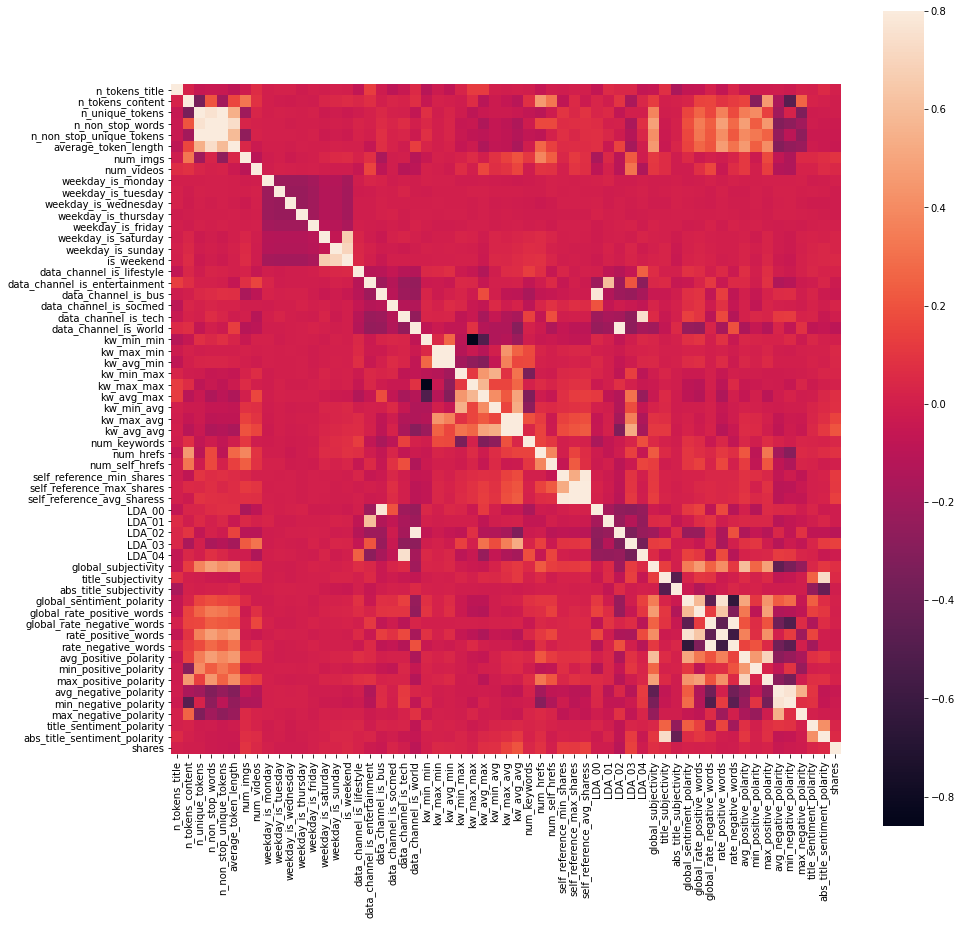

In [26]:
corr = data_1.corr()
fig = plt.figure(figsize = (15,15))
sns.heatmap(corr, vmax = .8, square = True)
plt.show()

# Train-Test Splitting

In [27]:
data_2.columns

Index(['n_tokens_title', 'n_tokens_content', 'n_unique_tokens',
       'n_non_stop_words', 'n_non_stop_unique_tokens', 'average_token_length',
       'num_imgs', 'num_videos', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend',
       'data_channel_is_lifestyle', 'data_channel_is_entertainment',
       'data_channel_is_bus', 'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'num_keywords', 'num_hrefs', 'num_self_hrefs',
       'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03',
       'LDA_04', 'global_subjectivity', 'title_subjectivity',
       'abs_title_subjectivity', 'global_sentiment_polarity',
       

In [28]:
y=data_2["shares"]
X=data_2.drop(columns="shares")


In [29]:
print(y.head())
print("_____________________________________________________________________")
print(X.head())

id
0    36700.0
1    24200.0
2      945.0
3      844.0
4      551.0
Name: shares, dtype: float64
_____________________________________________________________________
    n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
id                                                                        
0              8.0             211.0         0.629808               1.0   
1             12.0             416.0         0.603535               1.0   
2              7.0             229.0         0.638393               1.0   
3              9.0             473.0         0.542373               1.0   
4             13.0            1097.0         0.505213               1.0   

    n_non_stop_unique_tokens  average_token_length  num_imgs  num_videos  \
id                                                                         
0                   0.800000              4.606635       0.0    0.000000   
1                   0.663580              5.004808       1.0   13.738769   
2  

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

[i.shape for i in [X_train, X_test, y_train, y_test]]

[(20813, 58), (8920, 58), (20813,), (8920,)]

In [31]:
#Metric report function
#Code reference - https://stackoverflow.com/a/57239611/4755954

def regression_results(y_true, y_pred):

    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)

    print('explained_variance: ', round(explained_variance,4))    
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

In [32]:
imp=SimpleImputer(strategy='mean',missing_values = np.nan)
scale = MinMaxScaler()
pca = PCA(.95,random_state=100)
model_1 = LinearRegression()
model_2 = Ridge()
model_3 = Lasso()
model_4 = RandomForestRegressor()

In [33]:
# Bundle preprocessing and modeling code in a pipeline
my_pipeline1 = Pipeline(steps=[('imp', imp),
                              ('scaling',scale),
                              ('pca',pca),
                              ('model_1', model_1)
                             ])


In [34]:
my_pipeline2 = Pipeline(steps=[('imp', imp),
                              ('scaling',scale),
                              ('pca',pca),
                              ('model_2', model_2)
                             ])

In [35]:
my_pipeline3 = Pipeline(steps=[('imp', imp),
                              ('scaling',scale),
                              ('pca',pca),
                              ('model_3', model_3)
                             ])

In [36]:
my_pipeline4 = Pipeline(steps=[('imp', imp),
                              ('scaling',scale),
                              ('pca',pca),
                              ('model_4', model_4)
                             ])

In [37]:
params1 = [{'model_1__n_jobs':[-1]}]

In [38]:
params2 = [{'model_2__alpha':[1e-3,1e-2,1,5,10],'model_2__random_state':[100]}]

In [39]:
params3 = [{'model_3__alpha':[1e-3,1e-2,1,5,10],'model_3__random_state':[100]}]

In [52]:
params4 = [{'model_4__n_estimators':[1000,2000],'model_4__random_state':[100],'model_4__max_depth':[30,50,80],
            'model_4__n_jobs':[-1],'model_4__min_samples_split': [2,3],'model_4__min_samples_leaf': [5,10,20,30]}]

In [41]:
gs_1 = GridSearchCV(my_pipeline1,
                      param_grid=params1,
                      scoring='neg_mean_absolute_error',
                      cv=4)


In [42]:
gs_2 = GridSearchCV(my_pipeline2,
                      param_grid=params2,
                      scoring='neg_mean_absolute_error',
                      cv=4)


In [43]:
gs_3 = GridSearchCV(my_pipeline3,
                      param_grid=params3,
                      scoring='neg_mean_absolute_error',
                      cv=4)


In [53]:
gs_4 = GridSearchCV(my_pipeline4,
                      param_grid=params4,
                      scoring='neg_mean_absolute_error',
                      cv=4)


In [45]:
gs_1.fit(X_train, y_train.to_numpy().reshape(-1,))
print(gs_1.best_params_)
train_pred = gs_1.predict(X_train)
test_pred = gs_1.predict(X_test)

print("Train metrics")
regression_results(y_train.to_numpy().reshape(-1,), train_pred)

print("")
print("Test metrics")
regression_results(y_test.to_numpy().reshape(-1,), test_pred)

{'model_1__n_jobs': -1}
Train metrics
explained_variance:  0.062
r2:  0.062
MAE:  2542.561
MSE:  25106899.0971
RMSE:  5010.6785

Test metrics
explained_variance:  0.0486
r2:  0.0485
MAE:  2501.6903
MSE:  23820350.6495
RMSE:  4880.6097


In [46]:
gs_2.fit(X_train, y_train.to_numpy().reshape(-1,))
print(gs_2.best_params_)
train_pred = gs_2.predict(X_train)
test_pred = gs_2.predict(X_test)

print("Train metrics")
regression_results(y_train.to_numpy().reshape(-1,), train_pred)

print("")
print("Test metrics")
regression_results(y_test.to_numpy().reshape(-1,), test_pred)

{'model_2__alpha': 0.01, 'model_2__random_state': 100}
Train metrics
explained_variance:  0.062
r2:  0.062
MAE:  2542.5611
MSE:  25106899.0972
RMSE:  5010.6785

Test metrics
explained_variance:  0.0486
r2:  0.0485
MAE:  2501.6902
MSE:  23820347.1743
RMSE:  4880.6093


In [47]:
gs_3.fit(X_train, y_train.to_numpy().reshape(-1,))
print(gs_3.best_params_)
train_pred = gs_3.predict(X_train)
test_pred = gs_3.predict(X_test)

print("Train metrics")
regression_results(y_train.to_numpy().reshape(-1,), train_pred)

print("")
print("Test metrics")
regression_results(y_test.to_numpy().reshape(-1,), test_pred)

{'model_3__alpha': 1, 'model_3__random_state': 100}
Train metrics
explained_variance:  0.062
r2:  0.062
MAE:  2542.6613
MSE:  25107527.9559
RMSE:  5010.7413

Test metrics
explained_variance:  0.0488
r2:  0.0487
MAE:  2501.5133
MSE:  23813930.8914
RMSE:  4879.9519


In [ ]:
gs_4.fit(X_train, y_train.to_numpy().reshape(-1,))
print(gs_4.best_params_)
print("")

train_pred = gs_4.predict(X_train)
test_pred = gs_4.predict(X_test)

print("Train metrics")
regression_results(y_train.to_numpy().reshape(-1,), train_pred)

print("")
print("Test metrics")
regression_results(y_test.to_numpy().reshape(-1,), test_pred)

In [ ]:
submission_data = unseen[features2].set_index('id')
submission_data.shape

In [ ]:
unseen['shares'] = gs_4.predict(submission_data)
output = unseen[['id','shares']]
output.head()

In [ ]:
output.to_csv('submission.csv',index=False)